## Kinematics Projectile Motion Analyzer

This notebook is a GUI-driven application that allows a user to enter initial conditions for a projectile being launched. The initial conditions are the angle at which the projectile is launched (in degrees), the initial height, and the initial velocity.

The notebook outputs information on the projectile, including the x- and y-position and velocity function for multiple angles, including the one the user inputs.

The motion of the projectile is plotted at the end.

Equations for when the angle is 15.0 degrees:
y-velocity:


x-velocity:


y-position:


x-position:


The maximum height of the projectile happens at t=5.277 with a height of 186.569.
The range of the projectile is 2210.814.


Equations for when the angle is 30.0 degrees:
y-velocity:


x-velocity:


y-position:


x-position:


The maximum height of the projectile happens at t=10.194 with a height of 559.684.
The range of the projectile is 3615.771.


Equations for when the angle is 45.0 degrees:
y-velocity:


x-velocity:


y-position:


x-position:


The maximum height of the projectile happens at t=14.416 with a height of 1069.368.
The range of the projectile is 4126.873.


Equations for when the angle is 75.0 degrees:
y-velocity:


x-velocity:


y-position:


x-position:


The maximum height of the projectile happens at t=19.693 with a height of 1952.167.
The range of the projectile is 2052.047.


Equations for when the angle is 17.0 degrees:
y-velocity:


x-velocity:


y-position:


x-position:


The maximum height of the projectile happens at t=5.961 with a height of 224.274.
The range of the projectile is 2433.337.




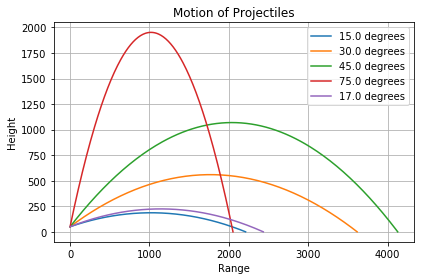

In [1]:
import tkinter as tk
import numpy as np
import scipy as sp
from sympy import *
from scipy.integrate import odeint
from IPython.display import display
import matplotlib.pyplot as plt
init_printing()

window = tk.Tk()
window.title("Kinematics")

#initial height
lab = tk.Label(window, text = "Initial Height: ").grid(column=0, row=0)
ent = tk.Entry(window, width=10)
ent.grid(column=1, row=0)
ent.insert(0, '0')

#initial projectile velocity
lab1 = tk.Label(window, text = "Initial Velocity: ").grid(column=0,row=1)
ent1 = tk.Entry(window, width=10)
ent1.grid(column=1, row=1)
ent1.insert(0, '0')

#angle of elevation
lab2 = tk.Label(window, text = "Projectile Angle: ").grid(column=0,row=2)
ent2 = tk.Entry(window, width=10)
ent2.grid(column=1,row=2)
ent2.insert(0, '0')

#gravitational acceleration
lab3 = tk.Label(window, text = "Gravity: ").grid(column=0,row=3)
ent3 = tk.Entry(window, width=10)
ent3.grid(column=1,row=3)
ent3.insert(0, "-9.81")


def clicked():
    initial_height = ent.get()
    initial_height = float(initial_height)
    initial_velocity = ent1.get()
    initial_velocity = float(initial_velocity)
    angle = ent2.get()
    angle_fig = angle
    angle = float(angle)
    angle_list = angle
    angle = np.radians(angle)
    gravity = ent3.get()
    gravity = float(gravity)
    
    v = Function('v')
    s = Function('s')
    t = symbols('t')
    
    ranges = []
    heights = []
    angles = [15.0, 30.0, 45.0, 75.0, angle_list]
    angles_radians = np.radians(angles)
    
    #loop through all the requested angles to get their ranges and heights
    for ang in angles:
        #velocity components
        initial_yvelocity = np.sin(np.radians(ang))*initial_velocity
        initial_xvelocity = np.cos(np.radians(ang))*initial_velocity
        
        #equation for the velocity in the y direction
        myODE = Eq(diff(v(t),t), gravity)
        y_velocity = dsolve(myODE, v(t))
        y_velocity = y_velocity.subs(symbols('C1'), initial_yvelocity)
        
        #equation for position in the y direction
        myODE = Eq(diff(s(t),t),y_velocity.rhs)
        y_position = dsolve(myODE, s(t))
        y_position = y_position.subs(symbols('C1'), initial_height)
        
        #equation for velocity in the x direction
        myODE = Eq(diff(v(t),t), 0)
        x_velocity = dsolve(myODE, v(t))
        x_velocity = x_velocity.subs(symbols('C1'), initial_xvelocity)
        
        #equation for the position in the x direction
        myODE = Eq(diff(s(t),t), x_velocity.rhs)
        x_position = dsolve(myODE, s(t))
        x_position = x_position.subs(symbols('C1'), 0)
        
        #getting arrays for height and range
        range_time = solve(y_position.rhs, t)
        time=np.linspace(0, float(range_time[1]), 200)
        f_orig_y = lambdify(t, y_position.rhs)
        f_orig_x = lambdify(t, x_position.rhs)
        y = f_orig_y(time)
        x = f_orig_x(time)
        ranges.append(x)
        heights.append(y)
        
        print('Equations for when the angle is ' + str(ang) + ' degrees:')
        print("y-velocity:")
        display(y_velocity)
        print("x-velocity:")
        display(x_velocity)
        print("y-position:")
        display(y_position)
        print("x-position:")
        display(x_position)
        
        #Find the maximum height, set y-velocity=0
        max_height_time = solve(y_velocity.rhs, t)
        max_height = y_position.rhs.subs(t,max_height_time[0])
        print("The maximum height of the projectile happens at t=" + "%.3f"%max_height_time[0] + " with a height of " "%.3f"%max_height + ".")

        #solving for when the y-position is equal to zero (second time) will get us the time when the max range is reached
        range_time = solve(y_position.rhs, t)
        max_range = x_position.rhs.subs(t,range_time[1])
        print("The range of the projectile is " + "%.3f"%max_range + ".")
        print('\n')
        
    
    %matplotlib inline
    fig = plt.figure()
    plt.grid()
    ax = fig.add_subplot(111)
    for i in range(len(angles)):
        ax.plot(ranges[i], heights[i], label = str(angles[i]) + ' degrees')
    
    ax.set_xlabel("Range")
    ax.set_ylabel("Height")
    ax.set_title("Motion of Projectiles")
    ax.legend(loc="best")
    fig.tight_layout()
    window.destroy()
    #fig.show()
    
    
button = tk.Button(window, text = "Enter", command = clicked)
button.grid(column=0,row=4)

window.mainloop()
plt.show()